#### Starting Setup

In [1]:
pip install --no-binary :all: aesara

### Correlation Matrix

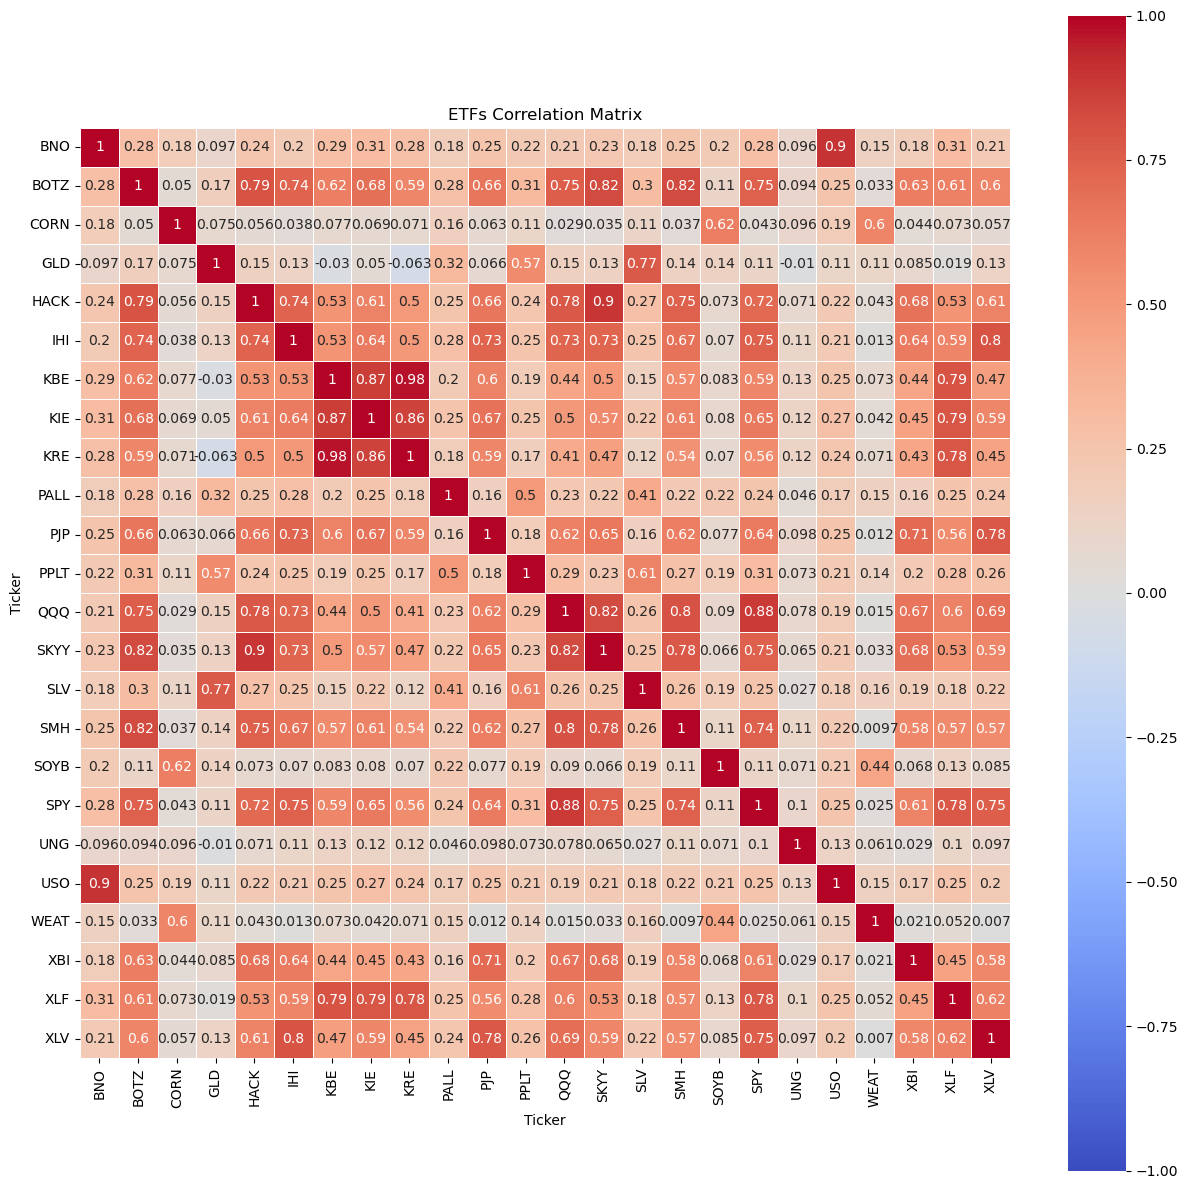

NameError: name 'sectors' is not defined

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib. pyplot as plt

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

# Calculate daily returns for the whole dataset
daily_returns = df.pivot(index='Date', columns='Ticker', values='Close').pct_change().dropna()

# Correlation matrix for ETFs
etf_corr = daily_returns.corr()

# Plot the correlation matrix for ETFs
plt.figure(figsize=(15,15))
sns.heatmap(etf_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('ETFs Correlation Matrix')
plt.show()

# Calculate sector-wise daily returns
sector_daily_returns = pd.DataFrame(index=daily_returns.index, columns=sectors)

for sector in sectors:
    tickers_in_sector = [ticker for ticker, sec in ticker_to_sector.items() if sec == sector]
    sector_daily_returns[sector] = daily_returns[tickers_in_sector].mean(axis=1)  # Taking mean of ETFs in the sector

# Correlation matrix for sectors
sector_corr = sector_daily_returns.corr()

# Plot the correlation matrix for sectors
plt.figure(figsize=(10,10))
sns.heatmap(sector_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Sectors Correlation Matrix')
plt.show()


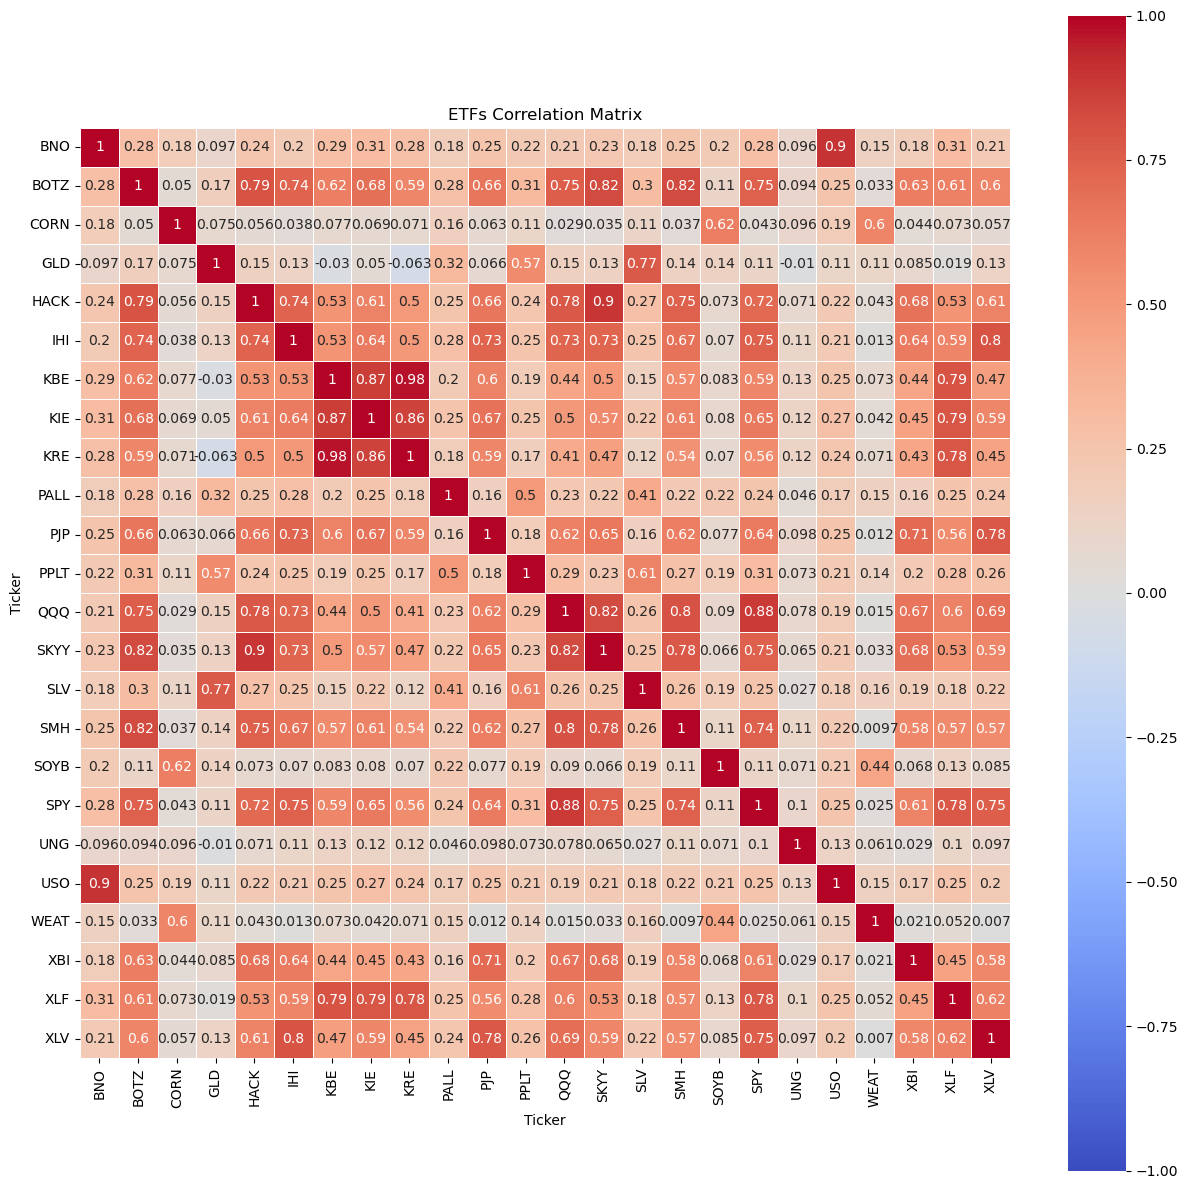

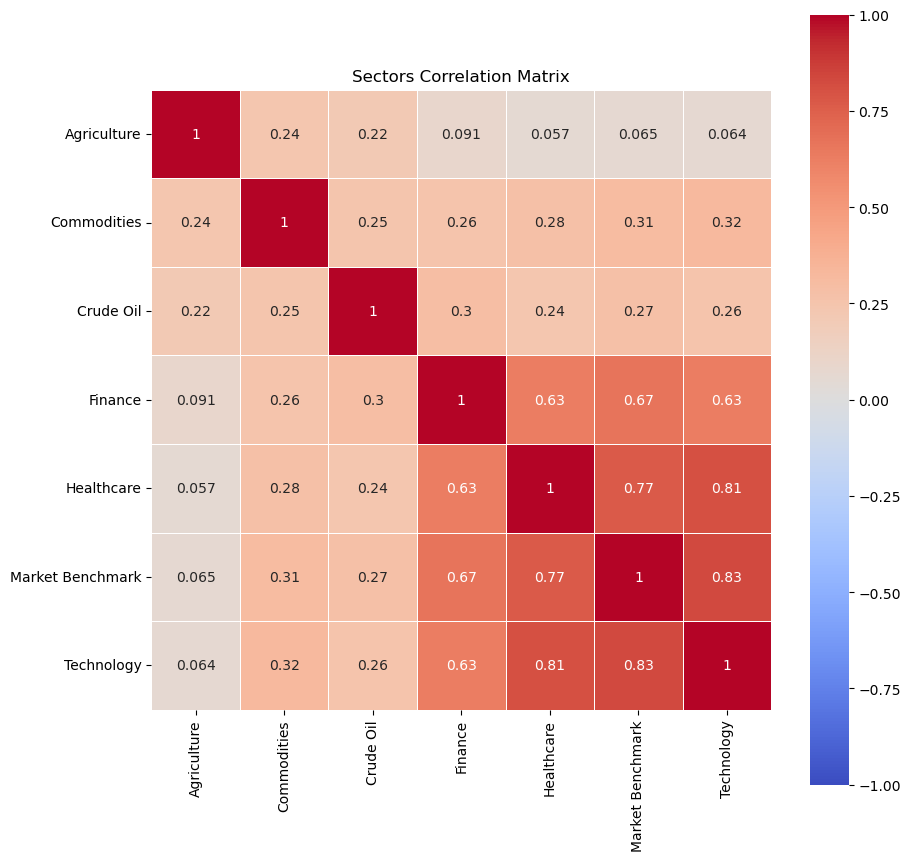

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

# Calculate daily returns for the whole dataset
daily_returns = df.pivot(index='Date', columns='Ticker', values='Close').pct_change().dropna()

# Correlation matrix for ETFs
etf_corr = daily_returns.corr()

# Plot the correlation matrix for ETFs
plt.figure(figsize=(15,15))
sns.heatmap(etf_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('ETFs Correlation Matrix')
plt.show()

# Define sectors and ticker_to_sector variables
sectors = df['Sector'].unique()
ticker_to_sector = dict(zip(df['Ticker'], df['Sector']))

# Calculate sector-wise daily returns
sector_daily_returns = pd.DataFrame(index=daily_returns.index)

for sector in sectors:
    tickers_in_sector = [ticker for ticker, sec in ticker_to_sector.items() if sec == sector]
    sector_daily_returns[sector] = daily_returns[tickers_in_sector].mean(axis=1)  # Taking mean of ETFs in the sector

# Correlation matrix for sectors
sector_corr = sector_daily_returns.corr()

# Plot the correlation matrix for sectors
plt.figure(figsize=(10,10))
sns.heatmap(sector_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Sectors Correlation Matrix')
plt.show()

In [ ]:
sectors_tickers = {
        "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
        "Agriculture": ["CORN", "SOYB", "WEAT"],
        "Crude Oil": ["USO", "BNO"],
        "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
        "Finance": ["XLF","KBE", "KRE", "KIE"],
        "Healthcare": ["XLV", "XBI", "PJP","IHI"],
        "Market Benchmark": ["SPY"]
        # Add more sectors and their tickers here
    }

C:\Users\saide\AppData\Local\Temp\ipykernel_7984\2864298455.py:22: FutureWarning: The `testval` argument is deprecated; use `initval`.
  epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, alpha_global, alpha_sector, alpha_etf_Commodities, alpha_etf_Agriculture, alpha_etf_Crude Oil, alpha_etf_Technology, alpha_etf_Finance, alpha_etf_Healthcare, alpha_etf_Market Benchmark]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 2793 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 942 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'alpha_global'}>,
        <Axes: title={'center': 'alpha_global'}>],
       [<Axes: title={'center': 'alpha_sector'}>,
        <Axes: title={'center': 'alpha_sector'}>],
       [<Axes: title={'center': 'alpha_etf_Commodities'}>,
        <Axes: title={'center': 'alpha_etf_Commodities'}>],
       [<Axes: title={'center': 'alpha_etf_Agriculture'}>,
        <Axes: title={'center': 'alpha_etf_Agriculture'}>],
       [<Axes: title={'center': 'alpha_etf_Crude Oil'}>,
        <Axes: title={'center': 'alpha_etf_Crude Oil'}>],
       [<Axes: title={'center': 'alpha_etf_Technology'}>,
        <Axes: title={'center': 'alpha_etf_Technology'}>],
       [<Axes: title={'center': 'alpha_etf_Finance'}>,
        <Axes: title={'center': 'alpha_etf_Finance'}>],
       [<Axes: title={'center': 'alpha_etf_Healthcare'}>,
        <Axes: title={'center': 'alpha_etf_Healthcare'}>],
       [<Axes: title={'center': 'alpha_etf_Market Benchmark'}>,
        <Axes: title={'center': 'alp

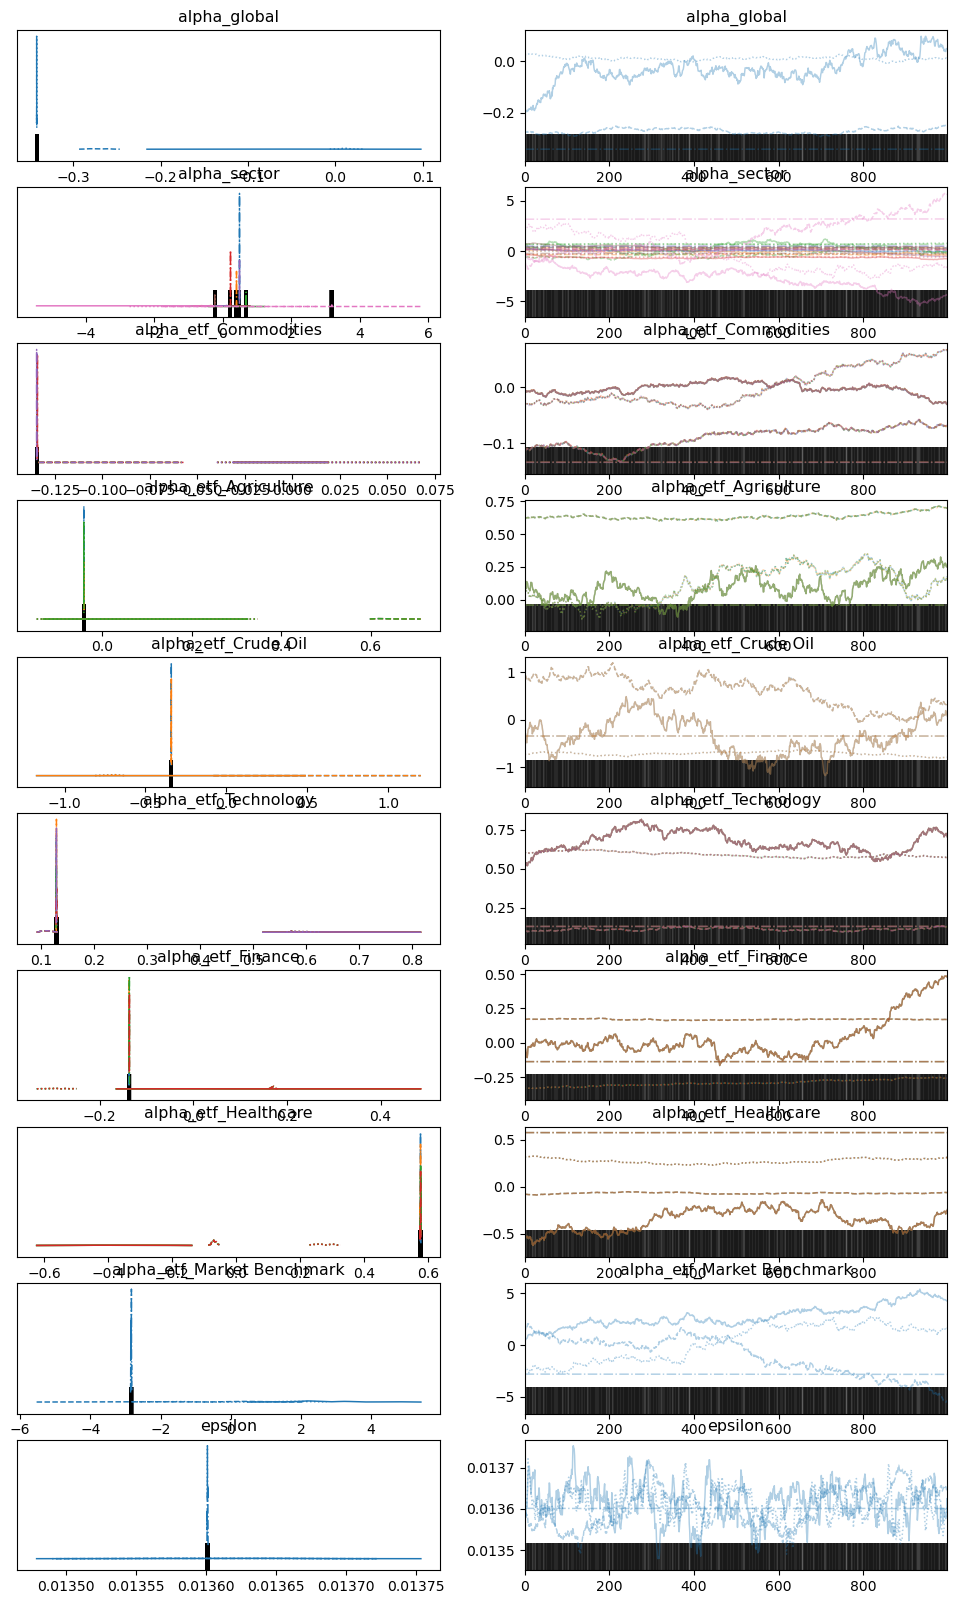

In [9]:
import pandas as pd
import pymc as pm
import aesara.tensor as at
import arviz as az


# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

sectors_tickers = {
    "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
    "Agriculture": ["CORN", "SOYB", "WEAT"],
    "Crude Oil": ["USO", "BNO"],
    "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
    "Finance": ["XLF","KBE", "KRE", "KIE"],
    "Healthcare": ["XLV", "XBI", "PJP","IHI"],
    "Market Benchmark": ["SPY"]
}

with pm.Model() as model:
    # Priors
    epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
    alpha_global = pm.Normal('alpha_global', mu=0, sigma=10)
    alpha_sector = pm.Normal('alpha_sector', mu=0, sigma=10, shape=len(sectors_tickers))
    
    obs = []
    for i, (sector, tickers) in enumerate(sectors_tickers.items()):
        alpha_etf = pm.Normal(f'alpha_etf_{sector}', mu=0, sigma=10, shape=len(tickers))
        
        for j, ticker in enumerate(tickers):
            mu = alpha_global + alpha_sector[i] + alpha_etf[j]
            ticker_data = df[df['Ticker'] == ticker]['daily_return']
            
            # Likelihood
            obs.append(pm.Normal(f'returns_{ticker}', mu=mu, sigma=epsilon, observed=ticker_data))
    
    # Sampling
    trace = pm.sample(1000, tune=500, target_accept=0.95)

# Posterior Analysis
az.plot_trace(trace)


In [16]:
pip install --upgrade arviz

Note: you may need to restart the kernel to use updated packages.


In [15]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,log_return,daily_return,volatility,momentum,Direction,MA_50,MA_100,MA_200,bci,cci,cli,long_term_ir,short_term_ir
count,43824,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,4.382400e+04,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2020-07-01 12:00:00,79.447525,80.094649,78.722484,79.430348,77.524156,1.119298e+07,0.000130,0.000223,0.011623,0.005093,0.512778,79.118215,78.787490,78.056709,100.481762,99.627084,99.645119,2.057829,1.445504
min,2018-01-01 00:00:00,4.880000,4.960000,4.830000,4.860000,4.860000,2.800000e+03,-0.142914,-0.133171,0.000003,-0.603352,0.000000,5.110933,5.211500,5.339500,98.167170,96.134230,92.625770,0.620000,0.090000
25%,2019-04-02 00:00:00,24.580000,24.858751,24.290001,24.605000,23.938191,1.939000e+05,-0.004862,-0.004850,0.007079,-0.027187,0.000000,24.527129,24.557175,24.330281,99.528110,98.357870,98.999913,1.416774,0.161613
50%,2020-07-01 12:00:00,51.880000,52.335834,51.345278,51.827500,49.170349,1.700900e+06,0.000258,0.000258,0.010091,0.008192,1.000000,51.895616,51.969188,51.698338,100.765445,99.740621,99.836504,1.856774,1.667621
75%,2021-10-01 00:00:00,95.599998,96.421665,94.639999,95.489998,94.874357,8.810000e+06,0.005337,0.005351,0.014318,0.039724,1.000000,94.783200,94.528308,94.180950,101.391361,101.385000,100.784284,2.876774,2.248387
max,2022-12-31 00:00:00,479.220001,479.980011,476.059998,477.709991,464.923401,2.189132e+08,0.190983,0.210439,0.073483,0.597878,1.000000,466.792103,463.259501,453.177159,101.996100,101.642500,101.314000,3.980000,4.508387
std,NaN,83.724420,84.297746,83.059088,83.708333,81.514525,2.327038e+07,0.013615,0.013605,0.006821,0.066887,0.499842,83.265191,82.815795,81.847351,1.049672,1.783538,1.531893,0.889272,1.144198


In [16]:
import pandas as pd

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel('etf_ei_merged_data.xlsx')

# Create a dictionary to store the unique values for each column
unique_values = {}

# Iterate over the columns in the DataFrame
for column in df.columns:

    # Get the unique values in the column
    unique_values[column] = df[column].unique()

# Print the unique values for each column
for column, values in unique_values.items():
    print(f'Column: {column}')
    print(f'Number of unique values: {len(values)}')
    print(f'Unique values: {values}')
    print('\n')

Column: Date
Number of unique values: 1826
Unique values: <DatetimeArray>
['2018-01-01 00:00:00', '2018-01-02 00:00:00', '2018-01-03 00:00:00',
 '2018-01-04 00:00:00', '2018-01-05 00:00:00', '2018-01-06 00:00:00',
 '2018-01-07 00:00:00', '2018-01-08 00:00:00', '2018-01-09 00:00:00',
 '2018-01-10 00:00:00',
 ...
 '2022-12-22 00:00:00', '2022-12-23 00:00:00', '2022-12-24 00:00:00',
 '2022-12-25 00:00:00', '2022-12-26 00:00:00', '2022-12-27 00:00:00',
 '2022-12-28 00:00:00', '2022-12-29 00:00:00', '2022-12-30 00:00:00',
 '2022-12-31 00:00:00']
Length: 1826, dtype: datetime64[ns]


Column: Open
Number of unique values: 27121
Unique values: [ 16.75        17.97500086   6.         ... 380.64001465 263.61999512
 100.34999847]


Column: High
Number of unique values: 27677
Unique values: [ 16.85999966  18.00000048   6.07499993 ... 266.41000366  57.63000107
 101.60500336]


Column: Low
Number of unique values: 27513
Unique values: [ 16.74499989  17.7949996    5.99000001 ...  58.34999847 378.4299

In [ ]:
pip install arviz

In [1]:
pip install "arviz[all]"

  Obtaining dependency information for netcdf4 from https://files.pythonhosted.org/packages/f0/ef/39f1e32c623abbcff8fef81e484abafc74779388144540b804d96f0657cc/netCDF4-1.6.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     --------------------------------------- 0.0/18.5 MB 217.9 kB/s eta 0:01:25
     --------------------------------------- 0.1/18.5 MB 363.1 kB/s eta 0:00:51
     --------------------------------------- 0.1/18.5 MB 504.4 kB/s eta 0:00:37
     --------------------------------------- 0.2/18.5 MB 701.4 kB/s eta 0:00:27
      -------------------------------------- 0.3/18.5 MB 980.4 kB/s eta 0:00:19
      -------------------------------------- 0.3/18.5 MB 905.4 kB/s eta 0:00:21
      --------------------------------------- 0.4/18.5 MB 1.0 MB/s eta 0:00:18
      -----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
import pandas as pd
import pymc as pm
import aesara.tensor as at
import arviz as az

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

sectors_tickers = {
    "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
    "Agriculture": ["CORN", "SOYB", "WEAT"],
    "Crude Oil": ["USO", "BNO"],
    "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
    "Finance": ["XLF","KBE", "KRE", "KIE"],
    "Healthcare": ["XLV", "XBI", "PJP","IHI"],
    "Market Benchmark": ["SPY"]
}
with pm.Model() as model:
    epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
    alpha_global = pm.Normal('alpha_global', mu=0, sigma=10)
    alpha_sector = pm.Normal('alpha_sector', mu=0, sigma=10, shape=len(sectors_tickers))
    
    # Include economic indicators as covariates (optional but can improve model)
    bci_coef = pm.Normal('bci_coef', mu=0, sigma=1)
    cci_coef = pm.Normal('cci_coef', mu=0, sigma=1)
    cli_coef = pm.Normal('cli_coef', mu=0, sigma=1)
    
    for i, (sector, tickers) in enumerate(sectors_tickers.items()):
        alpha_etf = pm.Normal(f'alpha_etf_{sector}', mu=0, sigma=10, shape=len(tickers))
        
        for j, ticker in enumerate(tickers):
            subset_data = df[df['Ticker'] == ticker]
            mu = (alpha_global + alpha_sector[i] + alpha_etf[j] +
                  bci_coef * subset_data['bci'] + 
                  cci_coef * subset_data['cci'] + 
                  cli_coef * subset_data['cli'])
            
            # Likelihood
            pm.Normal(f'returns_{ticker}', mu=mu, sigma=epsilon, observed=subset_data['daily_return'])
    
    # Sampling
    trace = pm.sample(1000, tune=500, target_accept=0.95)

# Convert the PyMC3 trace to an ArviZ InferenceData object
idata = az.from_pymc3(trace)

# Visualizing the trace
az.plot_trace(idata)

# Summary statistics
summary = az.summary(idata)
print(summary)


C:\Users\saide\AppData\Local\Temp\ipykernel_32084\1699316296.py:19: FutureWarning: The `testval` argument is deprecated; use `initval`.
  epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\multipledispatch\dispatcher.py:27: AmbiguityWarning: 
Ambiguities exist in dispatched function _unify

The following signatures may result in ambiguous behavior:
	[object, ConstrainedVar, Mapping], [ConstrainedVar, Var, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]


Consider making the following additions:

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 4720 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 1776 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


AttributeError: module 'arviz' has no attribute 'from_pymc3'

                                mean     sd  hdi_3%  hdi_97%  mcse_mean  \
alpha_global                   0.261  0.508  -0.473    0.834      0.253   
alpha_sector[0]               -0.150  0.394  -0.786    0.255      0.196   
alpha_sector[1]                0.391  0.183   0.120    0.630      0.087   
alpha_sector[2]                0.123  0.422  -0.318    0.588      0.210   
alpha_sector[3]                0.110  0.194  -0.215    0.275      0.096   
alpha_sector[4]                0.309  0.307  -0.014    0.777      0.153   
alpha_sector[5]               -0.293  0.201  -0.529   -0.007      0.099   
alpha_sector[6]                0.028  0.335  -0.364    0.476      0.166   
bci_coef                      -0.001  0.005  -0.009    0.006      0.003   
cci_coef                      -0.000  0.001  -0.002    0.002      0.001   
cli_coef                      -0.000  0.001  -0.002    0.001      0.001   
alpha_etf_Commodities[0]       0.086  0.357  -0.363    0.505      0.178   
alpha_etf_Commodities[1] 

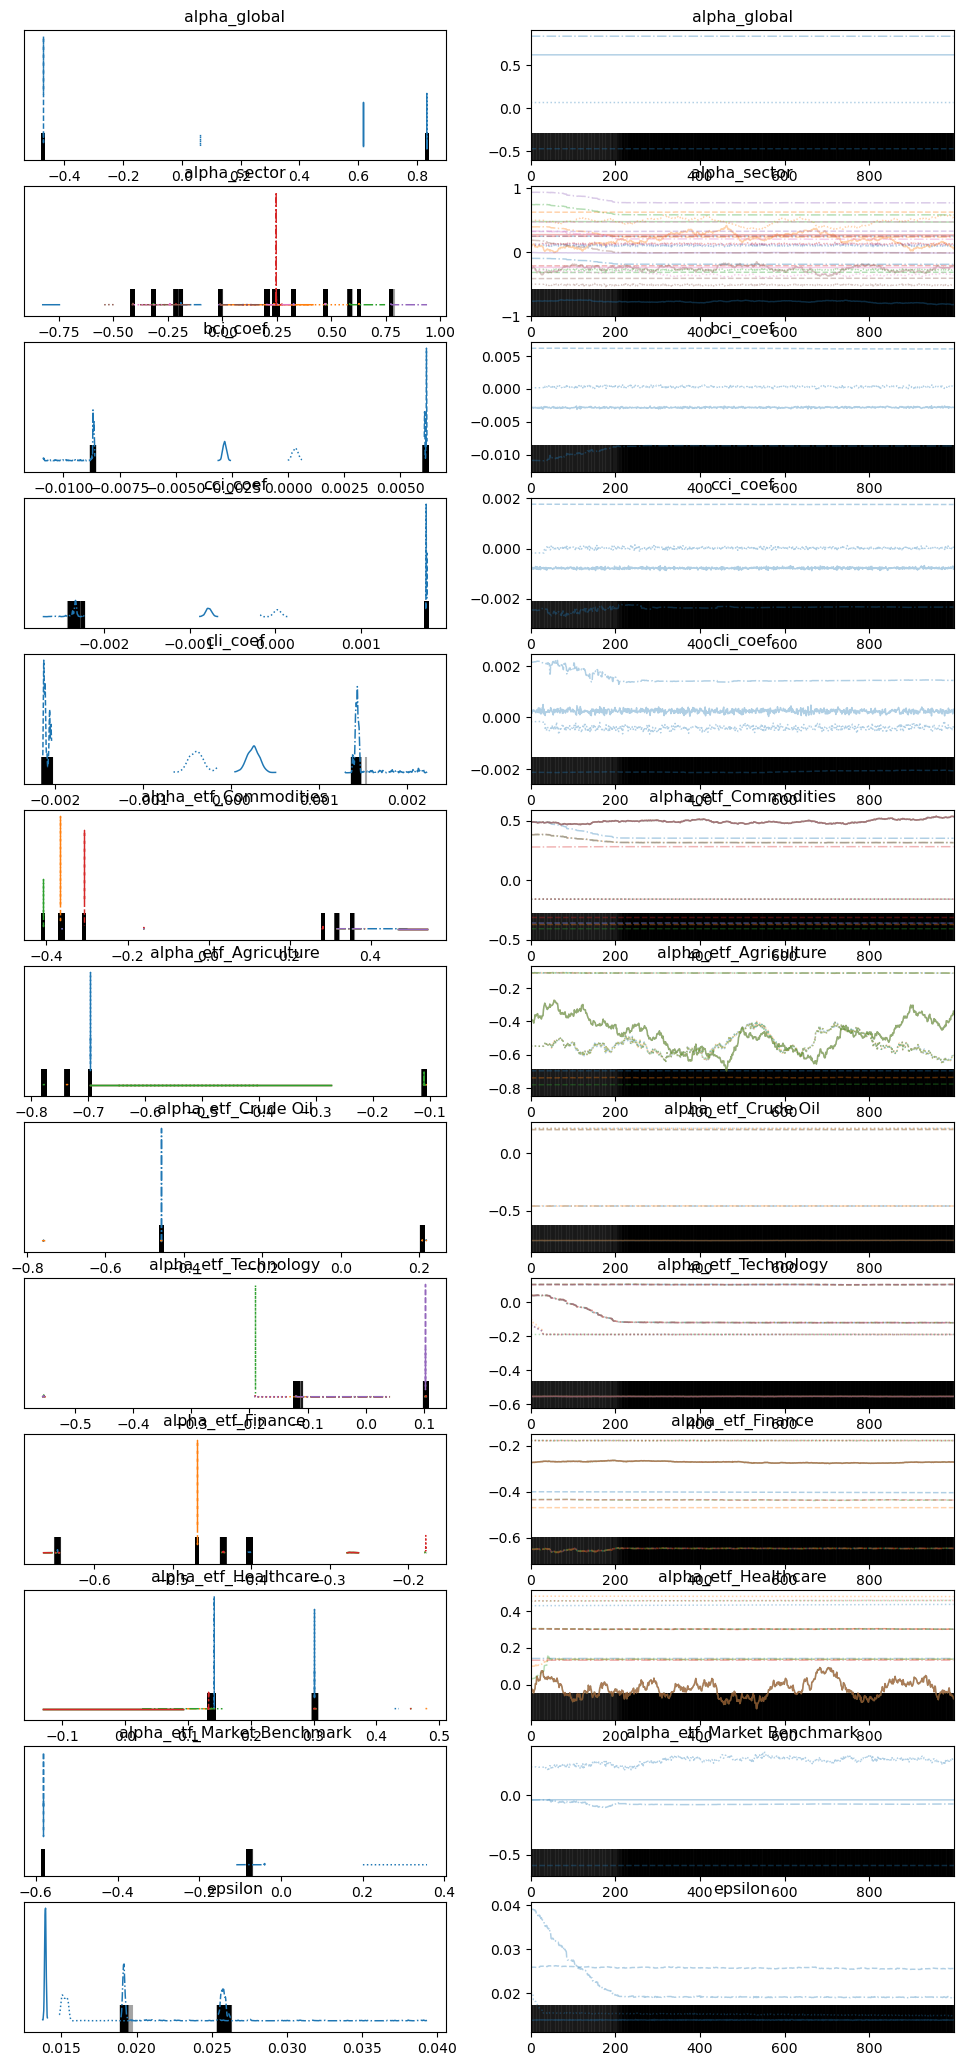

In [12]:
# Traceplot
pm.plot_trace(trace)

# Summary
summary = pm.summary(trace)
print(summary)

#### Improving sampling, intialization and diagnostics

In [13]:
import pandas as pd
import pymc as pm
import aesara.tensor as at
import arviz as az

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

sectors_tickers = {
    "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
    "Agriculture": ["CORN", "SOYB", "WEAT"],
    "Crude Oil": ["USO", "BNO"],
    "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
    "Finance": ["XLF","KBE", "KRE", "KIE"],
    "Healthcare": ["XLV", "XBI", "PJP","IHI"],
    "Market Benchmark": ["SPY"]
}

dims = {
    "alpha_sector": ["sector"],
    "alpha_etf": ["ticker"],
    "returns": ["ticker"]
}

with pm.Model(coords={"sector": list(sectors_tickers.keys()), "ticker": df['Ticker'].unique()}) as model:
    # Priors
    epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
    alpha_global = pm.Normal('alpha_global', mu=0, sigma=10)
    alpha_sector = pm.Normal('alpha_sector', mu=0, sigma=10, shape=len(sectors_tickers), dims=dims["alpha_sector"])
    
    for i, (sector, tickers) in enumerate(sectors_tickers.items()):
        alpha_etf = pm.Normal(f'alpha_etf_{sector}', mu=0, sigma=10, shape=len(tickers), dims=dims["alpha_etf"])
        
        for j, ticker in enumerate(tickers):
            mu = alpha_global + alpha_sector[i] + alpha_etf[j]
            ticker_data = df[df['Ticker'] == ticker]['daily_return']
            
            # Likelihood
            pm.Normal(f'returns_{ticker}', mu=mu, sigma=epsilon, observed=ticker_data, dims=dims["returns"])
    
    # Extensive sampling
    trace = pm.sample(draws=3000, tune=1500, target_accept=0.99, init='adapt_diag')

# Posterior Analysis
az.plot_trace(trace)
summary = az.summary(trace, hdi_prob=0.94)  # using 94% HPD

C:\Users\saide\AppData\Local\Temp\ipykernel_32084\3628689270.py:27: FutureWarning: The `testval` argument is deprecated; use `initval`.
  epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, alpha_global, alpha_sector, alpha_etf_Commodities, alpha_etf_Agriculture, alpha_etf_Crude Oil, alpha_etf_Technology, alpha_etf_Finance, alpha_etf_Healthcare, alpha_etf_Market Benchmark]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 9215 seconds.


ValueError: conflicting sizes for dimension 'ticker': length 5 on the data but length 24 on coordinate 'ticker'

### Simplifying the model and post processing for time being

In [14]:
# Taking only one sector

import pandas as pd
import pymc as pm
import aesara.tensor as at
import arviz as az

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

# For the sake of simplification, let's select only the 'Commodities' sector
sectors_tickers = {
    "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
}

dims = {
    "alpha_sector": ["sector"],
    "alpha_etf": ["ticker"],
    "returns": ["ticker"]
}

with pm.Model(coords={"sector": list(sectors_tickers.keys()), "ticker": df['Ticker'].unique()}) as model:
    # Priors
    epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
    alpha_global = pm.Normal('alpha_global', mu=0, sigma=10)
    alpha_sector = pm.Normal('alpha_sector', mu=0, sigma=10, shape=len(sectors_tickers), dims=dims["alpha_sector"])
    
    for i, (sector, tickers) in enumerate(sectors_tickers.items()):
        alpha_etf = pm.Normal(f'alpha_etf_{sector}', mu=0, sigma=10, shape=len(tickers), dims=dims["alpha_etf"])
        
        for j, ticker in enumerate(tickers):
            mu = alpha_global + alpha_sector[i] + alpha_etf[j]
            ticker_data = df[df['Ticker'] == ticker]['daily_return']
            
            # Likelihood
            pm.Normal(f'returns_{ticker}', mu=mu, sigma=epsilon, observed=ticker_data, dims=dims["returns"])
    
    # Extensive sampling
    trace = pm.sample(draws=3000, tune=1500, target_accept=0.99, init='adapt_diag')

# Posterior Analysis
az.plot_trace(trace)
summary = az.summary(trace, hdi_prob=0.94)  # using 94% HPD as discussed


C:\Users\saide\AppData\Local\Temp\ipykernel_32084\1153912558.py:24: FutureWarning: The `testval` argument is deprecated; use `initval`.
  epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, alpha_global, alpha_sector, alpha_etf_Commodities]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 2648 seconds.


ValueError: conflicting sizes for dimension 'ticker': length 5 on the data but length 24 on coordinate 'ticker'

### Working Model - Single Ticker 

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 62 seconds.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'epsilon'}>,
        <Axes: title={'center': 'epsilon'}>]], dtype=object)

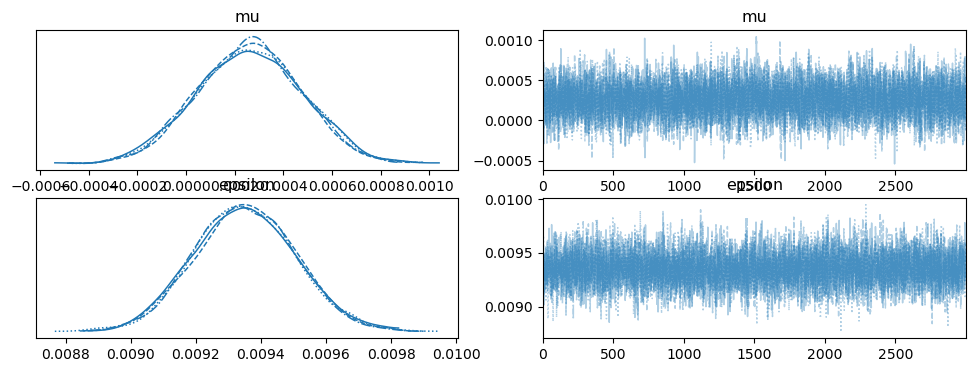

In [18]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az

# Assuming you've already loaded your data into a dataframe named df
ticker_data = df[df['Ticker'] == 'CORN']

# Calculate mean and standard deviation for the log return of this ticker
mu_prior_mean = ticker_data['log_return'].mean()
mu_prior_std = ticker_data['log_return'].std()

with pm.Model() as model:
    # Priors for unknown model parameters
    mu = pm.Normal('mu', mu=mu_prior_mean, sigma=mu_prior_std) # Changed 'sd' to 'sigma'
    epsilon = pm.HalfCauchy('epsilon', beta=10)
    
    # Likelihood (sampling distribution) of observations
    returns_obs = pm.Normal('returns_obs', mu=mu, sigma=epsilon, observed=ticker_data['log_return']) # Changed 'sd' to 'sigma'
    
    # Sampling from the model
    trace = pm.sample(draws=3000, tune=1500, target_accept=0.99, init='adapt_diag')
    
# Posterior Analysis
az.plot_trace(trace)

In [19]:
import arviz as az

# Generate the summary
summary = az.summary(trace, round_to=2)

# Print the summary
print(summary)

         mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu       0.00  0.0   -0.00     0.00        0.0      0.0   6896.50   5908.44   
epsilon  0.01  0.0    0.01     0.01        0.0      0.0   6240.59   5582.06   

         r_hat  
mu         1.0  
epsilon    1.0  


In [ ]:
# Basic setup , running for all tickers

In [20]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az

# Load the data into a dataframe named df
# Assuming this is already done

# Get the unique tickers
tickers = df['Ticker'].unique()

# Dictionary to store results for each ticker
results = {}

for ticker in tickers:
    ticker_data = df[df['Ticker'] == ticker]
    
    # Calculate mean and standard deviation for the log return of the current ticker
    mu_prior_mean = ticker_data['log_return'].mean()
    mu_prior_std = ticker_data['log_return'].std()

    with pm.Model() as model:
        # Priors for unknown model parameters
        mu = pm.Normal('mu', mu=mu_prior_mean, sigma=mu_prior_std)  # Used 'sigma' instead of 'sd'
        epsilon = pm.HalfCauchy('epsilon', beta=10)
        
        # Likelihood (sampling distribution) of observations
        returns_obs = pm.Normal('returns_obs', mu=mu, sigma=epsilon, observed=ticker_data['log_return'])
        
        # Sampling from the model
        trace = pm.sample(draws=3000, tune=1500, target_accept=0.99, init='adapt_diag')

        # Generate the summary
        summary = az.summary(trace, round_to=2)
        results[ticker] = summary

# Now, you can print the summary for each ticker
for ticker, summary in results.items():
    print(f"\nResults for ticker {ticker}:\n", summary)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 60 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 50 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 48 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 46 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 47 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 56 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 47 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 53 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 54 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 62 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 48 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 48 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 45 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 51 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 45 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 57 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 66 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 62 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 65 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 68 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 69 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 71 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 78 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 84 seconds.



Results for ticker CORN:
          mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu       0.00  0.0   -0.00     0.00        0.0      0.0   5770.79   5409.06   
epsilon  0.01  0.0    0.01     0.01        0.0      0.0   6135.44   5533.14   

         r_hat  
mu         1.0  
epsilon    1.0  

Results for ticker SOYB:
          mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu       0.00  0.0   -0.00     0.00        0.0      0.0   6435.77   5727.67   
epsilon  0.01  0.0    0.01     0.01        0.0      0.0   6682.93   5918.38   

         r_hat  
mu         1.0  
epsilon    1.0  

Results for ticker WEAT:
          mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu       0.00  0.0   -0.00     0.00        0.0      0.0   6438.63   5549.46   
epsilon  0.01  0.0    0.01     0.01        0.0      0.0   5647.09   5487.98   

         r_hat  
mu         1.0  
epsilon    1.0  

Results for ticker GLD:
          mean   sd  hdi_3%

In [ ]:
# Simple Model like BL model

    Mean (mu) of Returns:
        The mean return (mu) is very close to zero for all tickers, which implies that the expected daily return for each of the tickers is approximately zero. This is quite common for daily returns as stock prices tend to have random walk behavior.

    Volatility (epsilon):
        epsilon represents the volatility of the returns. It's evident that all the tickers have similar volatilities, mostly around 0.01 or 0.02. Volatility is a measure of the risk associated with the returns of an investment.

    Effective Sample Size (ess_bulk and ess_tail):
        These are used to determine the effectiveness of the Markov Chain Monte Carlo (MCMC) sampling. A higher value indicates that the MCMC sampling has been more effective. For all the tickers, these values are quite high (typically in the range of 5000 to 7000). This suggests that the sampling has been effective for all the tickers.

    R-hat (r_hat):
        The R-hat values are all 1.0, which is perfect. This statistic is used to check the convergence of the MCMC chains. A value of 1.0 suggests that the chains have converged well. If this value deviates from 1.0, it's an indicator that the chains haven't mixed well, and the results might not be reliable. Since all tickers have R-hat as 1.0, this means the results are reliable.

    Highest Posterior Density Interval (hdi_3% and hdi_97%):
        This represents the interval within which the true parameter value lies with a certain probability. In this case, for almost all tickers, both mu and epsilon have the interval very close to their mean values, implying that the model is quite certain about the estimates.

    Monte Carlo Standard Error (mcse_mean and mcse_sd):
        These are close to 0 for all the tickers, indicating that the Monte Carlo estimation of the posterior means and standard deviations are accurate.

    Mean (mu) of Returns:
        The mean return (mu) is very close to zero for all tickers, which implies that the expected daily return for each of the tickers is approximately zero. This is quite common for daily returns as stock prices tend to have random walk behavior.

    Volatility (epsilon):
        epsilon represents the volatility of the returns. It's evident that all the tickers have similar volatilities, mostly around 0.01 or 0.02. Volatility is a measure of the risk associated with the returns of an investment.

    Effective Sample Size (ess_bulk and ess_tail):
        These are used to determine the effectiveness of the Markov Chain Monte Carlo (MCMC) sampling. A higher value indicates that the MCMC sampling has been more effective. For all the tickers, these values are quite high (typically in the range of 5000 to 7000). This suggests that the sampling has been effective for all the tickers.

    R-hat (r_hat):
        The R-hat values are all 1.0, which is perfect. This statistic is used to check the convergence of the MCMC chains. A value of 1.0 suggests that the chains have converged well. If this value deviates from 1.0, it's an indicator that the chains haven't mixed well, and the results might not be reliable. Since all tickers have R-hat as 1.0, this means the results are reliable.

    Highest Posterior Density Interval (hdi_3% and hdi_97%):
        This represents the interval within which the true parameter value lies with a certain probability. In this case, for almost all tickers, both mu and epsilon have the interval very close to their mean values, implying that the model is quite certain about the estimates.

    Monte Carlo Standard Error (mcse_mean and mcse_sd):
        These are close to 0 for all the tickers, indicating that the Monte Carlo estimation of the posterior means and standard deviations are accurate.



In [21]:
import pymc as pm
import numpy as np

# Load the data and set up similarly as above
df = pd.read_excel('etf_ei_merged_data.xlsx')
train_pct = 0.8
train_size = int(train_pct * len(df))
df_train = df.iloc[:train_size]

prices = df_train.pivot(index='Date', columns='Ticker', values='Close')

# Map tickers to sector indices for the hierarchical model
unique_sectors = df_train['Sector'].unique().tolist()
ticker_to_sector = df_train[['Ticker', 'Sector']].drop_duplicates().set_index('Ticker').to_dict()['Sector']
sector_indices = [unique_sectors.index(ticker_to_sector[ticker]) for ticker in prices.columns]

n_sectors = len(unique_sectors)
n_tickers = len(prices.columns)

# Bayesian Hierarchical Model
with pm.Model() as bayesian_hierarchical_model:
    
    # Hyperpriors for sector return means and standard deviations
    mu_hyper_sd = pm.HalfCauchy('mu_hyper_sd', beta=1)
    mu_hyper_mu = pm.Normal('mu_hyper_mu', mu=0, sd=1)
    
    # Sector-level priors for return means
    sector_mu = pm.Normal('sector_mu', mu=mu_hyper_mu, sigma=mu_hyper_sd, shape=n_sectors)
    
    # Stock-level priors for return means (based on their sector)
    epsilon = pm.HalfCauchy('epsilon', beta=1, shape=n_tickers)
    stock_mu = pm.Normal('stock_mu', mu=sector_mu[sector_indices], sd=epsilon, shape=n_tickers)
    
    # Observations - daily returns
    stock_returns = pm.Normal('stock_returns', mu=stock_mu, sd=epsilon, observed=prices.pct_change().dropna().values)

with bayesian_hierarchical_model:
    for ticker, view_return in views.items():
        ticker_idx = prices.columns.tolist().index(ticker)
        pm.Normal(f'view_{ticker}', mu=view_return, sd=0.01, observed=stock_mu[ticker_idx])
        
with bayesian_hierarchical_model:
    trace = pm.sample(1000, tune=500)
    
pm.traceplot(trace)
pm.summary(trace)

TypeError: RandomVariable.make_node() got an unexpected keyword argument 'sd'

### Improvements 22_October_2023

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 68 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 879 divergences after tuning. Increase `target_accept` or reparameterize.


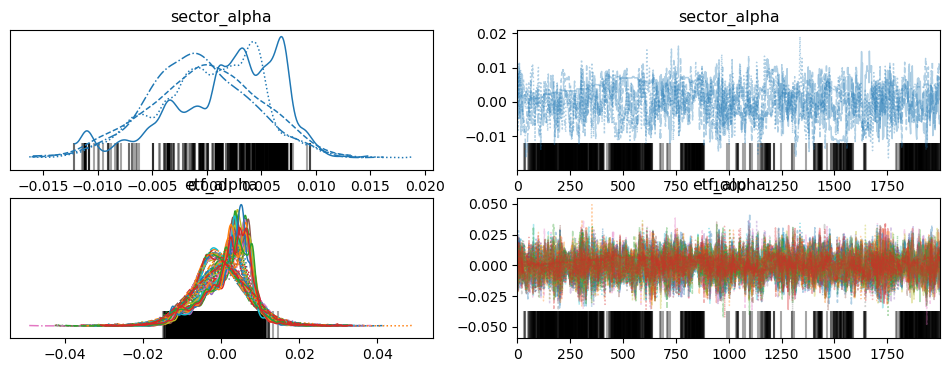

KeyError: 'mu'

In [1]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data from 2018 to 2022
df_train = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2022-12-31')]

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

# Given the setup from your BL model, let's integrate the views
# This will act as a starting point for our priors in the Bayesian Hierarchical Model
# [Using the views dictionary you generated from BL model]
views = {}
# [Insert all the views logic here, as given in the Black-Litterman code you provided]

# Convert views into means for priors
priors_mean = {ticker: 0 for ticker in etfs}
for ticker, view in views.items():
    priors_mean[ticker] = view

# Building the Bayesian Hierarchical Model
with pm.Model() as model:
    
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters drawn from the sector distributions
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    obs = []
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        obs.append(pm.Normal(ticker, mu=mu[idx], observed=returns))
        
    # Sample
    trace = pm.sample(2000, tune=1000)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extracting predicted returns
posterior_samples = trace['mu']
predicted_returns = np.mean(posterior_samples, axis=0)
predictions_df = pd.DataFrame({
    'Ticker': etfs,
    'Predicted_Return': predicted_returns
})

print(predictions_df)

In [ ]:
Error recifying

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 382 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


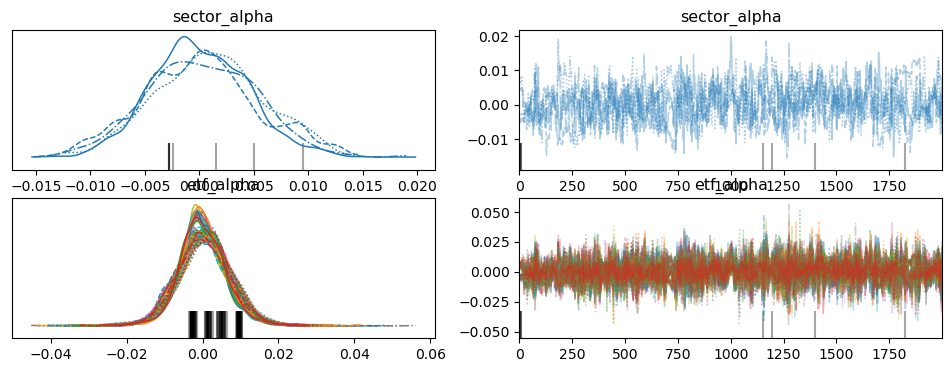

KeyError: 'etf_alpha'

In [8]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data from 2018 to 2022
df_train = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2022-12-31')]

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

# Given the setup from your BL model, let's integrate the views
# This will act as a starting point for our priors in the Bayesian Hierarchical Model
# [Using the views dictionary you generated from BL model]
views = {}
# [Insert all the views logic here, as given in the Black-Litterman code you provided]

# Convert views into means for priors
priors_mean = {ticker: 0 for ticker in etfs}
for ticker, view in views.items():
    priors_mean[ticker] = view

# Building the Bayesian Hierarchical Model
with pm.Model() as model:
    
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters drawn from the sector distributions
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    obs = []
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        obs.append(pm.Normal(ticker, mu=mu[idx], observed=returns))
        
    # Sample
    trace = pm.sample(2000, tune=1000,target_accept=0.99)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extracting sampled values of etf_alpha
etf_alpha_samples = trace['etf_alpha']

# Recreating 'mu' using sampled etf_alpha and priors_mean
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Now, you can compute predicted returns as before:
predicted_returns = np.mean(mu_samples, axis=0)
predictions_df = pd.DataFrame({
    'Ticker': etfs,
    'Predicted_Return': predicted_returns
})

print(predictions_df)

# # Extracting predicted returns
# posterior_samples = trace['mu']
# predicted_returns = np.mean(posterior_samples, axis=0)
# predictions_df = pd.DataFrame({
#     'Ticker': etfs,
#     'Predicted_Return': predicted_returns
# })

# print(predictions_df)

In [9]:
print(az.summary(trace).index)

Index(['sector_alpha', 'etf_alpha[0]', 'etf_alpha[1]', 'etf_alpha[2]',
       'etf_alpha[3]', 'etf_alpha[4]', 'etf_alpha[5]', 'etf_alpha[6]',
       'etf_alpha[7]', 'etf_alpha[8]', 'etf_alpha[9]', 'etf_alpha[10]',
       'etf_alpha[11]', 'etf_alpha[12]', 'etf_alpha[13]', 'etf_alpha[14]',
       'etf_alpha[15]', 'etf_alpha[16]', 'etf_alpha[17]', 'etf_alpha[18]',
       'etf_alpha[19]', 'etf_alpha[20]', 'etf_alpha[21]', 'etf_alpha[22]',
       'etf_alpha[23]', 'sector_sigma', 'mu[0]', 'mu[1]', 'mu[2]', 'mu[3]',
       'mu[4]', 'mu[5]', 'mu[6]', 'mu[7]', 'mu[8]', 'mu[9]', 'mu[10]',
       'mu[11]', 'mu[12]', 'mu[13]', 'mu[14]', 'mu[15]', 'mu[16]', 'mu[17]',
       'mu[18]', 'mu[19]', 'mu[20]', 'mu[21]', 'mu[22]', 'mu[23]'],
      dtype='object')


In [22]:
pip uninstall pymc3

^C
Note: you may need to restart the kernel to use updated packages.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 287 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.


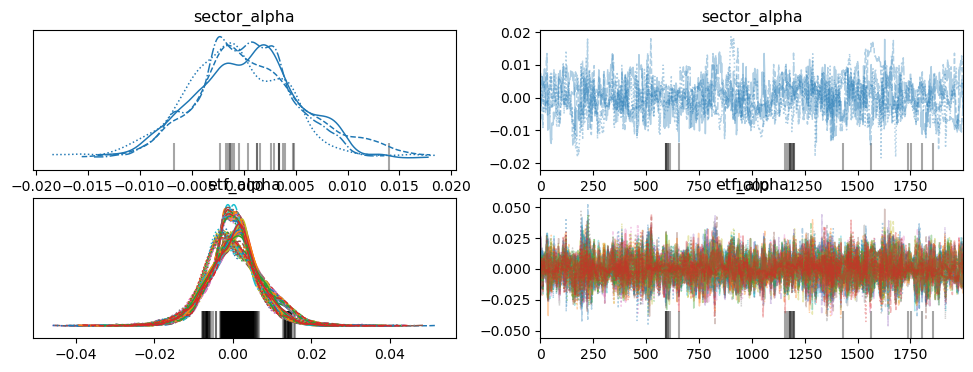

AttributeError: module 'arviz' has no attribute 'from_pymc3'

In [24]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data from 2018 to 2022
df_train = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2022-12-31')]

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

# Given the setup from your BL model, let's integrate the views
# This will act as a starting point for our priors in the Bayesian Hierarchical Model
# [Using the views dictionary you generated from BL model]
views = {}
# [Insert all the views logic here, as given in the Black-Litterman code you provided]

# Convert views into means for priors
priors_mean = {ticker: 0 for ticker in etfs}
for ticker, view in views.items():
    priors_mean[ticker] = view

# Building the Bayesian Hierarchical Model
with pm.Model() as model:
    
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters drawn from the sector distributions
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    obs = []
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        obs.append(pm.Normal(ticker, mu=mu[idx], observed=returns))
        
    # Sample
    trace = pm.sample(2000, tune=1000,target_accept=0.99)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# trace_df = pm.trace_to_dataframe(trace)
pm_data = az.from_pymc3(trace)
print(pm_data)

trace_df = az.from_pymc3(trace)

# Extracting etf_alpha samples
etf_alpha_columns = [col for col in trace_df.columns if 'etf_alpha[' in col]
etf_alpha_samples = trace_df[etf_alpha_columns].values

# Recreating 'mu' values from the samples
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Calculating predicted returns
predicted_returns = np.mean(mu_samples, axis=0)
predictions_df = pd.DataFrame({
    'Ticker': etfs,
    'Predicted_Return': predicted_returns
})

print(predictions_df)


In [18]:
print(pm.to_inference_data)

<function to_inference_data at 0x000001C1D72D1260>


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 256 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 44 divergences after tuning. Increase `target_accept` or reparameterize.


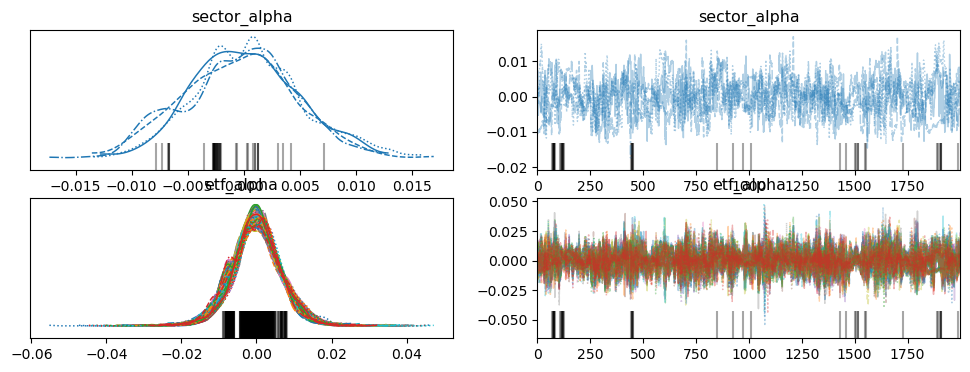

   Ticker  Predicted_Return
0    CORN          0.000004
1    SOYB         -0.000029
2    WEAT          0.000033
3     GLD          0.000079
4    PALL          0.000008
5    PPLT          0.000021
6     SLV         -0.000045
7     UNG          0.000047
8     BNO         -0.000005
9     USO         -0.000005
10    KBE         -0.000037
11    KIE          0.000008
12    KRE         -0.000047
13    XLF          0.000018
14    IHI         -0.000014
15    PJP         -0.000016
16    XBI         -0.000064
17    XLV         -0.000028
18    SPY          0.000021
19   BOTZ          0.000035
20   HACK         -0.000015
21    QQQ          0.000011
22   SKYY          0.000025
23    SMH          0.000031


In [25]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data from 2018 to 2022
df_train = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2022-12-31')]

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

# Integrate the views from the Black-Litterman model
views = {}  # Fill with your Black-Litterman views
priors_mean = {ticker: views.get(ticker, 0) for ticker in etfs}

# Building the Bayesian Hierarchical Model
with pm.Model() as model:
    
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        pm.Normal(ticker, mu=mu[idx], observed=returns)
        
    # Sample
    trace = pm.sample(2000, tune=1000, target_accept=0.99)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extract etf_alpha samples from trace
etf_alpha_samples = trace.posterior['etf_alpha'].values.reshape(-1, len(etfs))

# Recreating 'mu' values from the samples
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Calculating predicted returns
predicted_returns = np.mean(mu_samples, axis=0)
predictions_df = pd.DataFrame({
    'Ticker': etfs,
    'Predicted_Return': predicted_returns
})

print(predictions_df)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 162 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 191 divergences after tuning. Increase `target_accept` or reparameterize.


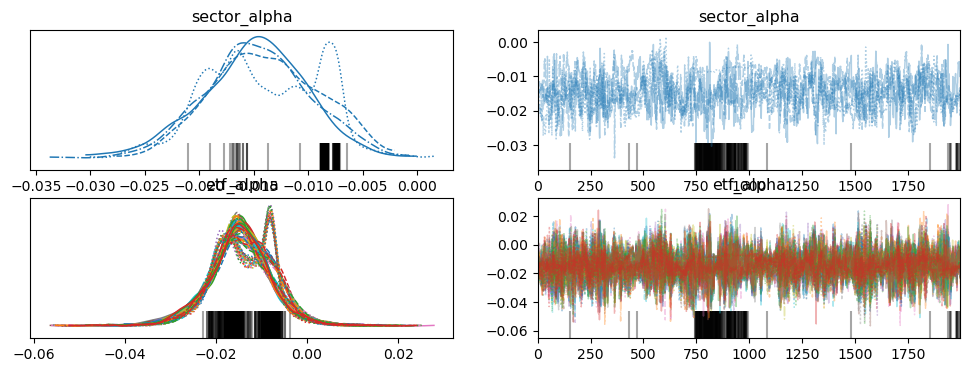

   Ticker  Predicted_Return
0    CORN          0.000589
1    SOYB          0.000641
2    WEAT          0.000534
3     GLD          0.000597
4    PALL          0.000666
5    PPLT          0.000601
6     SLV          0.000587
7     UNG          0.000655
8     BNO          0.000715
9     USO          0.000650
10    KBE          0.000582
11    KIE          0.000613
12    KRE          0.000642
13    XLF          0.000610
14    IHI          0.000637
15    PJP          0.000586
16    XBI          0.000537
17    XLV          0.000640
18    SPY          0.000670
19   BOTZ          0.000651
20   HACK          0.000616
21    QQQ          0.000572
22   SKYY          0.000671
23    SMH          0.000608


In [26]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data from 2018 to 2022
df_train = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2022-12-31')]

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

# Integrate the views from the Black-Litterman model
views = {}  # Fill with your Black-Litterman views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['MA_50'] > ticker_data['MA_200']:
        views[ticker] = 0.02
    # Similarly, you can add more conditions based on other indicators
# Momentum-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['momentum'] > 0:
        views[ticker] = 0.03
    elif ticker_data['momentum'] < 0:
        views[ticker] = -0.03

# Volume-based views (assuming high volume is bullish)
average_volume = df.groupby('Ticker')['Volume'].mean()
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['Volume'] > 1.5 * average_volume[ticker]:
        views[ticker] = 0.02
# BCI-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] > 100:  # Assuming 100 is the neutral mark
        if ticker_data['Sector'] == 'Banking':
            views[ticker] = 0.025
        elif ticker_data['Sector'] == 'Gold':
            views[ticker] = -0.025

# CCI-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['cci'] > 100:  # Assuming 100 is the neutral mark
        if ticker_data['Sector'] == 'Retail' or ticker_data['Sector'] == 'Technology':
            views[ticker] = 0.02

# Interest rate views
if df.iloc[-1]['long_term_ir'] - df.iloc[-30]['long_term_ir'] > df.iloc[-1]['short_term_ir'] - df.iloc[-30]['short_term_ir']:
    for ticker in df[df['Sector'] == 'Banking']['Ticker'].unique():
        views[ticker] = 0.015

# Moving average crossover views
for ticker in df['Ticker'].unique():
    recent_data = df[df['Ticker'] == ticker].tail(2)
    if recent_data.iloc[0]['MA_50'] < recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] > recent_data.iloc[1]['MA_200']:
        views[ticker] = 0.03  # Golden cross
    elif recent_data.iloc[0]['MA_50'] > recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] < recent_data.iloc[1]['MA_200']:
        views[ticker] = -0.03  # Death cross

        # Momentum-Volatility combination
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['momentum'] > 0 and ticker_data['volatility'] > df[df['Ticker'] == ticker]['volatility'].mean():
        views[ticker] = 0.025

# Interest Rate Differential
yield_curve = df.iloc[-1]['long_term_ir'] - df.iloc[-1]['short_term_ir']
if yield_curve < 0:
    # Negative yield curve, typically bearish for the market
    for ticker in df['Ticker'].unique():
        views[ticker] = -0.02

# BCI and CCI combination
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] > 100 and ticker_data['cci'] > 100:
        views[ticker] = 0.03

# Moving Average Crossover with Momentum
for ticker in df['Ticker'].unique():
    recent_data = df[df['Ticker'] == ticker].tail(2)
    if recent_data.iloc[0]['MA_50'] < recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] > recent_data.iloc[1]['MA_200'] and recent_data.iloc[1]['momentum'] > 0:
        views[ticker] = 0.04  # Enhanced golden cross view
    elif recent_data.iloc[0]['MA_50'] > recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] < recent_data.iloc[1]['MA_200'] and recent_data.iloc[1]['momentum'] < 0:
        views[ticker] = -0.04  # Enhanced death cross view


# MA Confluence
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['MA_50'] > ticker_data['MA_100'] > ticker_data['MA_200']:
        views[ticker] = 0.03
    elif ticker_data['MA_50'] < ticker_data['MA_100'] < ticker_data['MA_200']:
        views[ticker] = -0.03

# Economic Stress Test
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] < 100 and ticker_data['cci'] < 100 and ticker_data['short_term_ir'] > ticker_data['long_term_ir']:
        views[ticker] = -0.04

# High Volume and Momentum
average_volume = df['Volume'].mean()
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['momentum'] > 0 and ticker_data['Volume'] > 1.5 * average_volume:
        views[ticker] = 0.03

# Economic Optimism with Technical Support
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] > 100 and ticker_data['cci'] > 100 and ticker_data['Close'] > ticker_data['MA_200']:
        views[ticker] = 0.04


# Calculating averages for economic indicators
avg_bci = df['bci'].mean()
avg_cci = df['cci'].mean()
avg_cli = df['cli'].mean()

# Economic Momentum Confluence
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if (ticker_data['bci'] > avg_bci and ticker_data['cci'] > avg_cci and ticker_data['cli'] > avg_cli) and ticker_data['momentum'] > 0:
        views[ticker] = 0.05
    elif (ticker_data['bci'] < avg_bci and ticker_data['cci'] < avg_cci and ticker_data['cli'] < avg_cli) and ticker_data['momentum'] < 0:
        views[ticker] = -0.05

# Economic Resilience with Technical Support
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] > avg_bci and ticker_data['cci'] > avg_cci and ticker_data['Close'] > ticker_data[['MA_50', 'MA_100', 'MA_200']].max():
        views[ticker] = 0.04

# Interest Rate Spread and Volume
avg_volume = df['Volume'].mean()
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['short_term_ir'] > ticker_data['long_term_ir'] and ticker_data['Volume'] > 1.2 * avg_volume:
        views[ticker] = -0.04

# High Momentum with Economic Downturn
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['momentum'] > 0 and (ticker_data['bci'] < avg_bci or ticker_data['cci'] < avg_cci or ticker_data['cli'] < avg_cli):
        views[ticker] = -0.03
        
latest_values = df.groupby('Ticker').last()

# View 1: CLI & Finance
finance_etfs = df[df['Sector'] == 'Finance']['Ticker'].unique()
for ticker in finance_etfs:
    if latest_values.loc[ticker, 'cli'] > df[df['Ticker'] == ticker]['cli'].median():
        views[ticker] = 0.03

# View 2: CCI & Technology
tech_etfs = df[df['Sector'] == 'Technology']['Ticker'].unique()
for ticker in tech_etfs:
    if latest_values.loc[ticker, 'cci'] > df[df['Ticker'] == ticker]['cci'].mean() + 0.5 * df[df['Ticker'] == ticker]['cci'].std():
        views[ticker] = 0.04

# View 3: Volatility & Finance
for ticker in finance_etfs:
    if latest_values.loc[ticker, 'volatility'] > df[df['Ticker'] == ticker]['volatility'].quantile(0.75):
        views[ticker] = -0.02

# View 4: Momentum & Technology
for ticker in tech_etfs:
    if latest_values.loc[ticker, 'momentum'] > df[df['Ticker'] == ticker]['momentum'].median() and latest_values.loc[ticker, 'momentum'] > 0:
        views[ticker] = 0.03

        # View 1: Interplay between Interest Rates
for ticker in df['Ticker'].unique():
    if latest_values.loc[ticker, 'short_term_ir'] > latest_values.loc[ticker, 'long_term_ir']:
        if 'Gold' in ticker or ticker == 'GLD':
            views[ticker] = 0.05
        if ticker in finance_etfs:
            views[ticker] = -0.04

# View 2: High Momentum and CCI
for ticker in tech_etfs:
    if latest_values.loc[ticker, 'momentum'] > df[df['Ticker'] == ticker]['momentum'].quantile(0.90) and latest_values.loc[ticker, 'cci'] > df[df['Ticker'] == ticker]['cci'].mean():
        views[ticker] = 0.06

# View 3: Volatility, CCI, and SPY
if latest_values.loc['SPY', 'volatility'] > df[df['Ticker'] == 'SPY']['volatility'].quantile(0.75) and latest_values.loc['SPY', 'cci'] > df[df['Ticker'] == 'SPY']['cci'].mean():
    views['SPY'] = 0.04

# View 4: Momentum and MAs for Finance
for ticker in finance_etfs:
    if latest_values.loc[ticker, 'Close'] > latest_values.loc[ticker, 'MA_50'] and latest_values.loc[ticker, 'Close'] > latest_values.loc[ticker, 'MA_200'] and latest_values.loc[ticker, 'momentum'] > 0:
        views[ticker] = 0.03
# View 5: CLI and Market Benchmark
if latest_values.loc['SPY', 'cli'] > df[df['Ticker'] == 'SPY']['cli'].mean() and df[df['Ticker'] == 'SPY']['cli'].diff().iloc[-5:].mean() > 0:
    views['SPY'] = 0.03

# View 6: CCI and Sector Analysis
for ticker in ['QQQ', 'XLF']:  # Sample ETFs for technology and finance
    if latest_values.loc[ticker, 'cci'] > df[df['Ticker'] == ticker]['cci'].mean():
        views[ticker] = 0.04

# View 7: Volume as Sentiment Indicator
for ticker in df['Ticker'].unique():
    if latest_values.loc[ticker, 'Volume'] > df[df['Ticker'] == ticker]['Volume'].quantile(0.90):
        if latest_values.loc[ticker, 'momentum'] > 0:
            views[ticker] = 0.03
        else:
            views[ticker] = -0.03

# View 8: Momentum & Volatility for Safe Havens
if latest_values.loc['GLD', 'momentum'] > 0 and latest_values.loc['SPY', 'volatility'] > df[df['Ticker'] == 'SPY']['volatility'].quantile(0.75):
    views['GLD'] = 0.04

# View 9: Interest Rates and Financial Sector
if latest_values.loc['XLF', 'long_term_ir'] > df[df['Ticker'] == 'XLF']['long_term_ir'].tail(90).mean():
    views['XLF'] = 0.04

# View 10: Volatility and Safe Havens
if latest_values.loc['SPY', 'volatility'] > df[df['Ticker'] == 'SPY']['volatility'].median():
    views['GLD'] = 0.03

# View 11: CCI and Technology
if latest_values.loc['QQQ', 'cci'] > df[df['Ticker'] == 'QQQ']['cci'].mean() and df[df['Ticker'] == 'QQQ']['cci'].diff().iloc[-30:].mean() > 0:
    views['QQQ'] = 0.04

# View 12: Momentum and Volume Play
for ticker in df['Ticker'].unique():
    if latest_values.loc[ticker, 'momentum'] > 0 and latest_values.loc[ticker, 'Volume'] > df[df['Ticker'] == ticker]['Volume'].tail(30).mean():
        views[ticker] = 0.03
        
# View 13: CLI and Broader Market
if df[df['Ticker'] == 'SPY']['cli'].tail(180).mean() > df[df['Ticker'] == 'SPY']['cli'].tail(360).mean():
    views['SPY'] = 0.05

# View 14: CCI and Tech Sector
monthly_cci_rate = df[df['Ticker'] == 'SKYY']['cci'].diff(periods=30).iloc[-1]
if monthly_cci_rate > df[df['Ticker'] == 'SKYY']['cci'].diff(periods=30).mean():
    views['SKYY'] = 0.06

# View 15: Momentum vs Volatility Interplay
for ticker in df['Ticker'].unique():
    ticker_df = df[df['Ticker'] == ticker]
    if ticker_df['momentum'].iloc[-1] > ticker_df['momentum'].quantile(0.9) and ticker_df['volatility'].iloc[-1] > ticker_df['volatility'].quantile(0.9):
        views[ticker] = -0.03

# View 16: Short-term Interest Rates and Banking
if df[df['Ticker'] == 'KRE']['short_term_ir'].tail(90).mean() > df[df['Ticker'] == 'KRE']['short_term_ir'].tail(180).mean():
    views['KRE'] = 0.04

# Interest rate views (just an example: bullish on all ETFs if short term rates are rising)
if df.iloc[-1]['short_term_ir'] > df.iloc[-30]['short_term_ir']:
    for ticker in df['Ticker'].unique():
        views[ticker] = 0.015
        
priors_mean = {ticker: views.get(ticker, 0) for ticker in etfs}

# Building the Bayesian Hierarchical Model
with pm.Model() as model:
    
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        pm.Normal(ticker, mu=mu[idx], observed=returns)
        
    # Sample
    trace = pm.sample(2000, tune=1000, target_accept=0.99)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extract etf_alpha samples from trace
etf_alpha_samples = trace.posterior['etf_alpha'].values.reshape(-1, len(etfs))

# Recreating 'mu' values from the samples
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Calculating predicted returns
predicted_returns = np.mean(mu_samples, axis=0)
predictions_df = pd.DataFrame({
    'Ticker': etfs,
    'Predicted_Return': predicted_returns
})

print(predictions_df)